# Master MIND - IDLE

# Réseaux convolutionnels

------------------------------------------------------------------------

**Remarque:** Si vous arrivez ici sans avoir lu les instructions
d’installation sur la page du cours, ça ne va pas marcher. Goto
<https://schwander.isir.upmc.fr/enseignement/m1mind_idle/> dans ce cas.

# Exercice 1 - *Dataset* *CIFAR10*

On va utiliser le dataset
[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html), un petit dataset
(60000 exemples) d’images RGB de taille 32x32 (remarque: en cas de souci
de temps de calcul, on peut travailler sur un sous-ensemble, par exemple
10% des données).

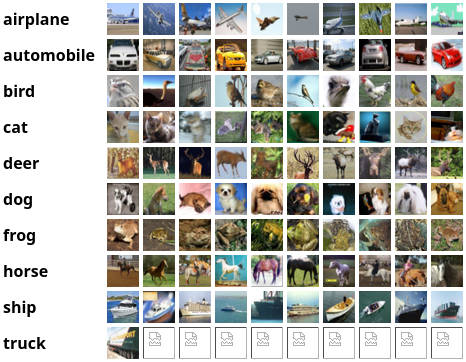

## Question 1 - *Chargement*

Charger le dataset en utilisant la fonction fournie par PyTorch
<https://docs.pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html>

In [31]:
from torchvision.datasets import CIFAR10 
import numpy as np

#traindata = CIFAR10(root="cifar10_data")


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

ex = unpickle(f"cifar-10-python/cifar-10-batches-py/data_batch_1")

labels = []
data = [] 

for i in range(1,6):
    dic = unpickle(f"cifar-10-python/cifar-10-batches-py/data_batch_{i}")
    labels.extend(dic[b'labels'])
    data.extend(dic[b'data'])


/tmp/ipykernel_76047/3936053218.py:10: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  dict = pickle.load(fo, encoding='bytes')


In [2]:
ex

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [32]:
#print(ex[b'labels'][:20])
#print(ex[b'data'])
print(data[:2])
print(labels[:2])

data = np.array(data)
labels = np.array(labels)
print(data.shape,labels.shape)

[array([ 59,  43,  50, ..., 140,  84,  72], shape=(3072,), dtype=uint8), array([154, 126, 105, ..., 139, 142, 144], shape=(3072,), dtype=uint8)]
[6, 9]
(50000, 3072) (50000,)


## Question 2 - *Exploration* *préliminaire*

Avec le module `pandas` ou `polars`, analyser rapidement le contenu du
dataset.

In [4]:
import pandas as pd
data_df = pd.DataFrame(data)
labels_df = pd.DataFrame(labels)

In [5]:
print(data_df[0].min(),data_df[0].max())
data_df

0 255


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,72,68,64,61,63,59,57,56,53,54
49996,255,254,255,254,254,254,254,253,254,254,...,57,61,64,68,64,76,82,79,81,76
49997,35,40,42,39,43,45,48,51,53,56,...,91,94,104,103,96,93,87,77,66,50
49998,189,186,185,184,182,181,180,180,181,180,...,160,166,171,171,172,169,165,169,171,171


In [6]:
labels_df

,0
0,6
1,9
2,9
3,4
4,1
...,...
49995,2
49996,6
49997,9
49998,1


# Exercice 2 - *Architecture*

## Question 3 - *Baseline*

Construire et évaluer un MLP pour cette tâche.

On veillera à tracer et à analyser les courbes d’apprentissage.

In [30]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt 

X = torch.tensor(data,dtype=torch.float32)/255.0
y = torch.tensor(labels,dtype=torch.long)

N = X.shape[0]
train_size = int(0.8 * N)
val_size = N - train_size
train_X,val_X = torch.split(X,[train_size,val_size])
train_y,val_y = torch.split(y,[train_size,val_size])

train_ds = TensorDataset(train_X,train_y)
val_ds = TensorDataset(val_X,val_y)

train_loader = DataLoader(train_ds,batch_size=128,shuffle=True)
val_loader = DataLoader(val_ds,batch_size=256,shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim=3072,hidden_dim=512,num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,num_classes)
    def forward(self,x):
        x = x.view(x.size(0),-1) # flatten to (n,3072)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    



def train_model(model,train_loader,val_loader,num_epochs,lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses,val_losses = [],[]
    train_accs, val_accs = [],[]

    for epoch in range(num_epochs):
        # traning
        model.train()
        running_loss,correct,total = 0.0,0,0
        for xb,yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            #print(xb.shape,yb.shape)
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits,yb)
            loss.backward()
            optimizer.step()

            #print("1:",xb.size(0),loss,loss.item())
            # loss.item()
            # xb.size(0) = 128  

            running_loss += loss.item()*xb.size(0) 
            preds = logits.argmax(dim=1)

            #print("2:",(preds == yb).sum().item(),(preds == yb).sum())
            correct += (preds == yb).sum().item()
            total += xb.size(0)
        train_loss = running_loss / total
        train_acc = correct/total

        #validation
        model.eval()
        val_running_loss,val_correct,val_total = 0.0,0,0
        with torch.no_grad():
            for xb,yb in val_loader:
                logits = model(xb)
                loss = criterion(logits,yb)
                val_running_loss += loss.item() * xb.size(0)
                preds = logits.argmax(dim=1)
                val_correct += (preds == yb).sum().item()
                #print(xb.size(0)) = 256 its the batch size
                val_total += xb.size(0) 

        val_loss = val_running_loss/val_total
        val_acc = val_correct/val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} - train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f}, train_acc: {train_acc:.4f}, val_acc: {val_acc:.4f}")
    return train_losses,val_losses,train_accs,val_accs





In [8]:
#torch.cuda.get_device_properties('cuda')
print(torch.__version__)
print(torch.cuda.is_available())

2.10.0+cpu
False


In [ ]:
mlp = MLP()

train_losses,val_losses,train_accs,val_accs = train_model(mlp,train_loader,val_loader,40)

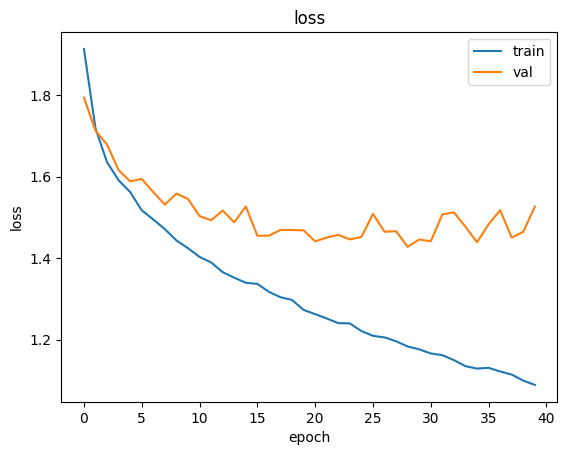

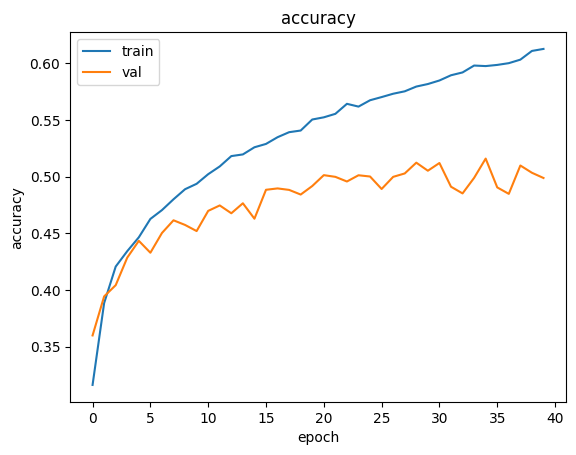

In [18]:
plt.figure()
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("loss")

plt.figure()
plt.plot(train_accs, label="train")
plt.plot(val_accs, label="val")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("accuracy")

plt.show()

#we can see the start of some over fitting, the val accuracy starting to get stagnant, but the train accuracy increases 

## Question 4 - *CNN*

Construire et évaluer un petit CNN (2 couches de convolution). On fera
en sorte que le nombre de couches soit un hyper-paramètre.

*On veillera à tracer et à analyser les courbes d’apprentissage.*

In [ ]:
class CNN(nn.Module):
    def __init__(self,num_conv_layers=2,num_channels=[8,16],num_classes=10):
        super().__init__()
        conv_layers = []
        in_ch = 3

        for i in range(num_conv_layers):
            out_ch = num_channels[i]
            conv_layers.extend([nn.Conv2d(in_ch,out_ch,kernel_size=3,padding=1),
                                nn.ReLU(),
                                nn.MaxPool2d(2)]) #max pool 2 divides size in 2
            in_ch = out_ch
        
        self.conv_stack = nn.Sequential(*conv_layers)
        spatial_size = 32 // (2 ** num_conv_layers)
        in_features = in_ch * spatial_size * spatial_size
        self.fc1 = nn.Linear(in_features, 512)
        self.fc2 = nn.Linear(512,num_classes)

    def forward(self,x): # n,3,32,32
        x = self.conv_stack(x)
        x = x.view(x.size(0),-1) # flatten to n,3*32*32
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [34]:
data = data.reshape(-1, 3, 32, 32)

X = torch.tensor(data, dtype=torch.float32) / 255.0
y = torch.tensor(labels,dtype=torch.long)

N = X.shape[0]
train_size = int(0.8 * N)
val_size = N - train_size
train_X,val_X = torch.split(X,[train_size,val_size])
train_y,val_y = torch.split(y,[train_size,val_size])

train_ds = TensorDataset(train_X,train_y)
val_ds = TensorDataset(val_X,val_y)

train_loader = DataLoader(train_ds,batch_size=128,shuffle=True)
val_loader = DataLoader(val_ds,batch_size=256,shuffle=False)


In [ ]:

model = CNN()
losses = train_model(model,train_loader,val_loader,num_epochs=5)

Epoch 1/5 - train_loss: 1.5593, val_loss: 1.3261, train_acc: 0.4375, val_acc: 0.5251
Epoch 2/5 - train_loss: 1.1811, val_loss: 1.0978, train_acc: 0.5801, val_acc: 0.6152
Epoch 3/5 - train_loss: 1.0070, val_loss: 1.0249, train_acc: 0.6448, val_acc: 0.6431
Epoch 4/5 - train_loss: 0.8823, val_loss: 0.9249, train_acc: 0.6878, val_acc: 0.6793
Epoch 5/5 - train_loss: 0.7885, val_loss: 0.9051, train_acc: 0.7212, val_acc: 0.6871


In [41]:
def view_loss_acc(losses):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(losses[0], label="train")
    plt.plot(losses[1], label="val")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.title("loss")

    plt.subplot(1, 2, 2)
    plt.plot(losses[2], label="train")
    plt.plot(losses[3], label="val")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title("accuracy")

    plt.tight_layout()
    plt.show()

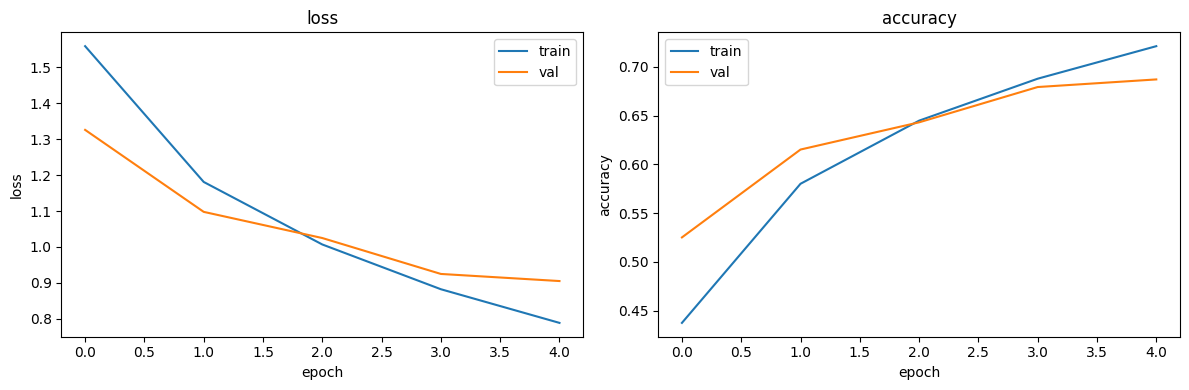

In [ ]:
view_loss_acc(losses)

## Question 5 - *Hyper-paramètres*

Réaliser une petite exploration des hyper-paramètres (notamment le
nombre de couches).

**On veillera à tracer et à analyser les courbes d’apprentissage.**

In [36]:
torch.backends.cudnn.benchmark = True  
torch.set_num_threads(18)  

losses = []
#1 couche
print("1 couche")
cnn1 = CNN(num_conv_layers=1, num_channels=[8])
losses.append(train_model(cnn1, train_loader, val_loader, num_epochs=5))

#2 couches
print("2 couches")
cnn2 = CNN(num_conv_layers=2, num_channels=[8,16])
losses.append(train_model(cnn2, train_loader, val_loader, num_epochs=3))

#3 couches
print("3 couches")
cnn3 = CNN(num_conv_layers=3, num_channels=[8,16,32])
losses.append(train_model(cnn3, train_loader, val_loader, num_epochs=3))

#4 couches
print("4 couche")
cnn4 = CNN(num_conv_layers=4, num_channels=[8,16,32,64])
losses.append(train_model(cnn4, train_loader, val_loader, num_epochs=3))


Epoch 1/5 - train_loss: 1.7329, val_loss: 1.5535, train_acc: 0.3775, val_acc: 0.4432
Epoch 2/5 - train_loss: 1.3998, val_loss: 1.3621, train_acc: 0.5000, val_acc: 0.5184
Epoch 3/5 - train_loss: 1.2738, val_loss: 1.2805, train_acc: 0.5478, val_acc: 0.5561
Epoch 4/5 - train_loss: 1.1987, val_loss: 1.2432, train_acc: 0.5765, val_acc: 0.5646
Epoch 5/5 - train_loss: 1.1383, val_loss: 1.2010, train_acc: 0.5982, val_acc: 0.5821
Epoch 1/3 - train_loss: 1.7220, val_loss: 1.4567, train_acc: 0.3784, val_acc: 0.4748
Epoch 2/3 - train_loss: 1.3855, val_loss: 1.3439, train_acc: 0.5040, val_acc: 0.5191
Epoch 3/3 - train_loss: 1.2684, val_loss: 1.2494, train_acc: 0.5464, val_acc: 0.5611
Epoch 1/3 - train_loss: 1.7736, val_loss: 1.5741, train_acc: 0.3476, val_acc: 0.4283
Epoch 2/3 - train_loss: 1.4674, val_loss: 1.4032, train_acc: 0.4673, val_acc: 0.4925
Epoch 3/3 - train_loss: 1.3515, val_loss: 1.3304, train_acc: 0.5121, val_acc: 0.5188
Epoch 1/3 - train_loss: 1.8454, val_loss: 1.6889, train_acc: 0.31

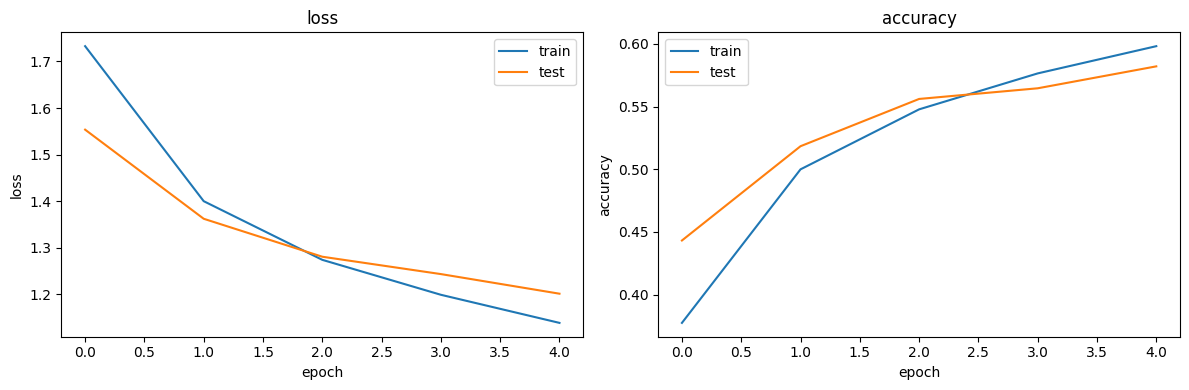

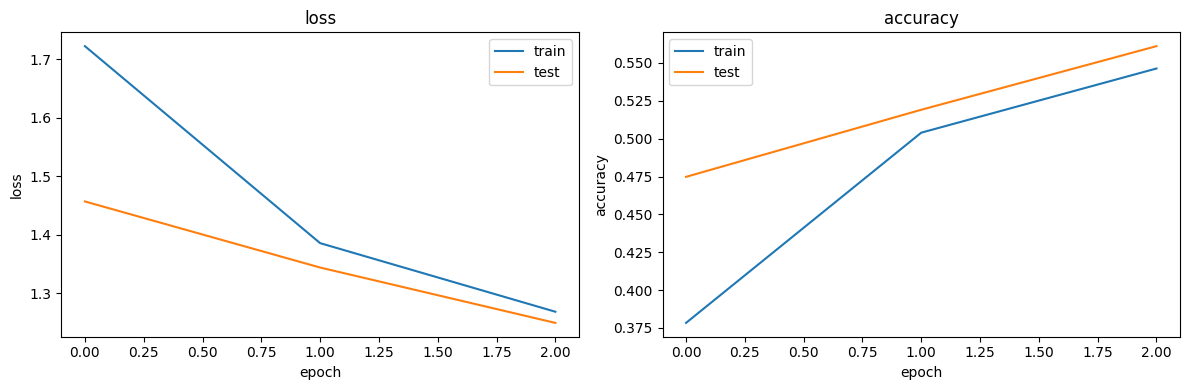

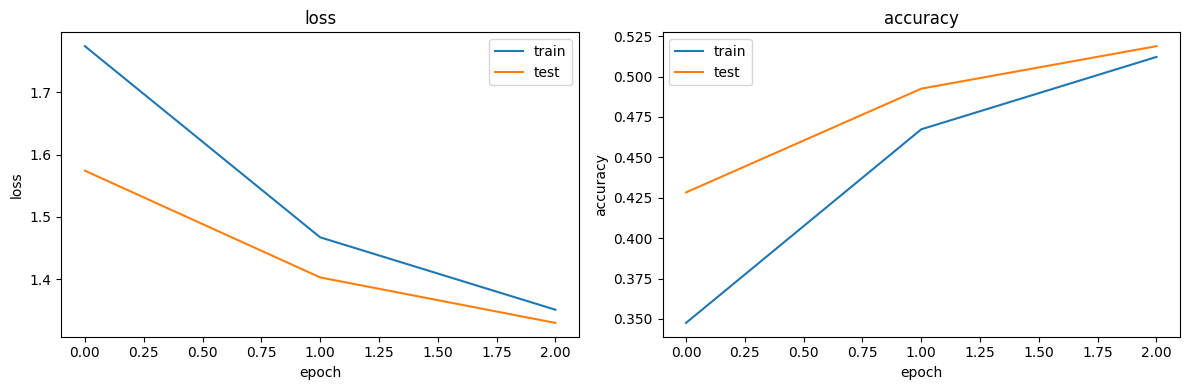

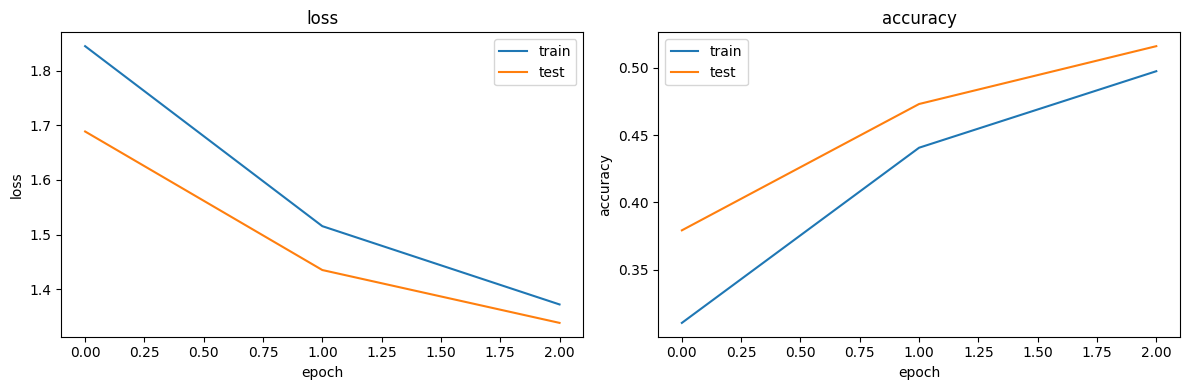

In [ ]:
for loss in losses:
    view_loss_acc(loss)

## Question 6 - *Courbes* *d’apprentissage*

En changeant la taille du réseau, la quantité de données ou d’autres
hyper-paramètres, faire apparaître sur les courbes d’apprentissage les
cas suivants:

-   sous-apprentissage
-   sur-apprentissage
-   optimisation ratée

Epoch 1/10 - train_loss: 237.3864, val_loss: 2.3185, train_acc: 0.0997, val_acc: 0.0977
Epoch 2/10 - train_loss: 2.3187, val_loss: 2.3190, train_acc: 0.1003, val_acc: 0.0977
Epoch 3/10 - train_loss: 2.3186, val_loss: 2.3243, train_acc: 0.0989, val_acc: 0.1014
Epoch 4/10 - train_loss: 2.3264, val_loss: 2.3129, train_acc: 0.1012, val_acc: 0.1016
Epoch 5/10 - train_loss: 2.3256, val_loss: 2.3382, train_acc: 0.1023, val_acc: 0.0977
Epoch 6/10 - train_loss: 2.3290, val_loss: 2.3196, train_acc: 0.0999, val_acc: 0.1025
Epoch 7/10 - train_loss: 2.3288, val_loss: 2.3433, train_acc: 0.0978, val_acc: 0.0980
Epoch 8/10 - train_loss: 2.3288, val_loss: 2.3122, train_acc: 0.0991, val_acc: 0.1022
Epoch 9/10 - train_loss: 2.3279, val_loss: 2.3088, train_acc: 0.0971, val_acc: 0.1016
Epoch 10/10 - train_loss: 2.3305, val_loss: 2.3253, train_acc: 0.0991, val_acc: 0.1014


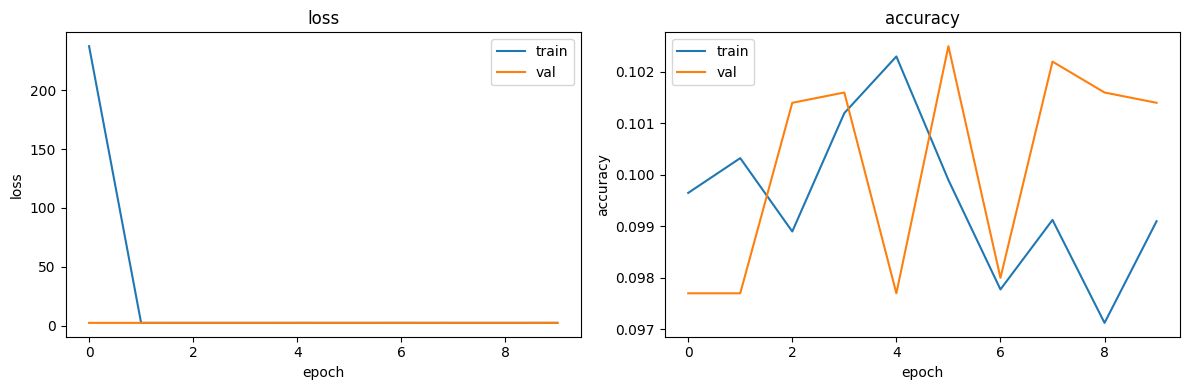

In [ ]:
cnna = CNN(num_conv_layers=1, num_channels=[4])
loss = train_model(cnna, train_loader, val_loader, num_epochs=10,lr=0.5)
view_loss_acc(loss)
# optimisation ratee lr beaucoup trop haut accuracy nul  

In [ ]:
cnna = CNN(num_conv_layers=1, num_channels=[4])
loss = train_model(cnna, train_loader, val_loader, num_epochs=10,lr=0.000001)
view_loss_acc(loss)
# sous apprentissage = train loss et train accuracy eleve, model n'apprend pas assez


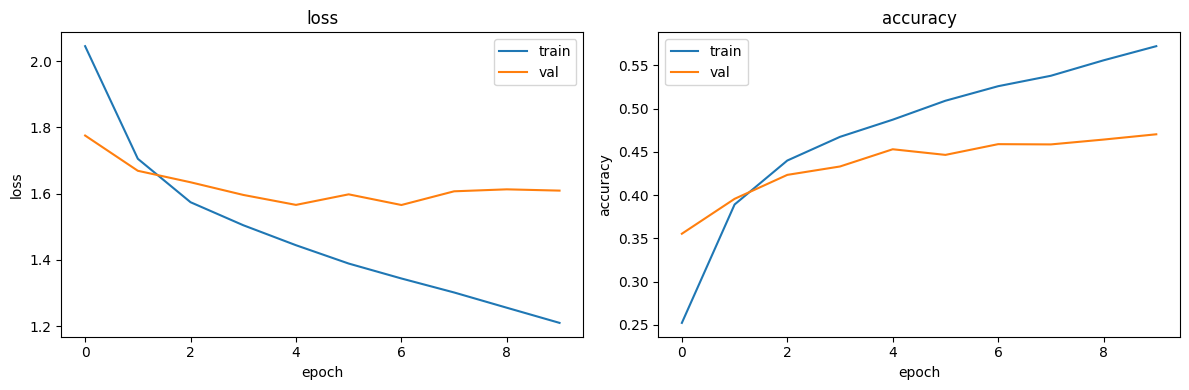

In [ ]:
cnna = CNN(num_conv_layers=1, num_channels=[4])
loss = train_model(cnna, train_loader, val_loader, num_epochs=1000,lr=0.001)
view_loss_acc(loss)
# sur apprentissage = train loss diminue mais val loss augmente 

# Exercice 3 - *Interprétation*

## Question 7 - *Cartes* *d’activation*

En manipulant l’implémation de l’architecutre, récupérer les cartes
d’activations finales.

En inférence, visualiser et analyser ces cartes.

Conclure sur le comportement du réseau.

In [43]:
class CNNWithHooks(CNN):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.activations = {} 
    
    def get_activation(self, name):
        def hook(model, input, output):
            self.activations[name] = output.detach()
        return hook


In [44]:
model = CNNWithHooks(num_conv_layers=2, num_channels=[32,64])
model.conv_stack[0].register_forward_hook(model.get_activation('conv1'))
model.conv_stack[3].register_forward_hook(model.get_activation('conv2'))  

In [45]:
model.eval()
with torch.no_grad():
    for xb, yb in val_loader:
        outputs = model(xb)
        break  

<Figure size 800x400 with 0 Axes>

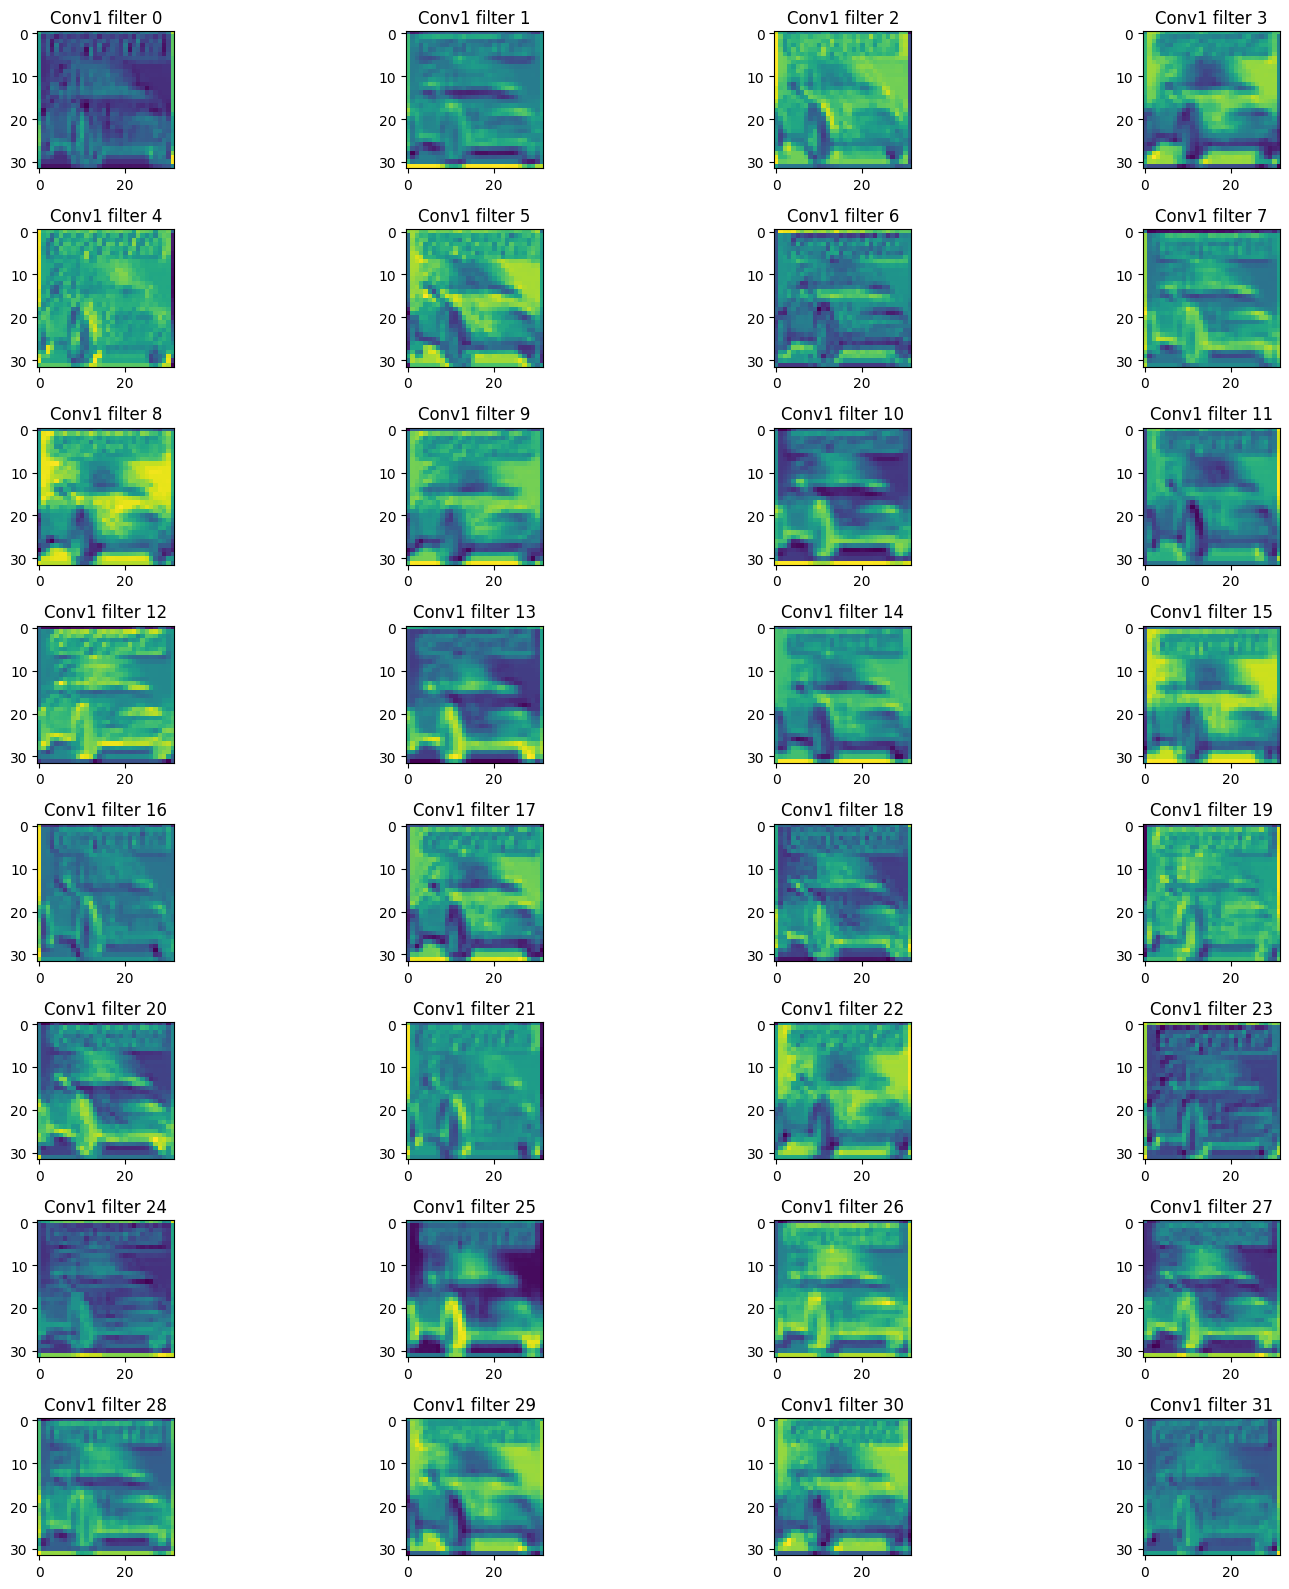

In [ ]:
plt.figure(figsize=(8, 4))

fig, axes = plt.subplots(8, 4, figsize=(16, 16))
for i in range(32):
    ax = axes[i//4, i%4]
    ax.imshow(model.activations['conv1'][0,i], cmap='viridis')
    ax.set_title(f'Conv1 filter {i}')
plt.tight_layout()
plt.show()


# on conclue que chaque filtre de la premiere activation detecte des elements elementaires comme des bords, lignes, angles etc

<Figure size 800x400 with 0 Axes>

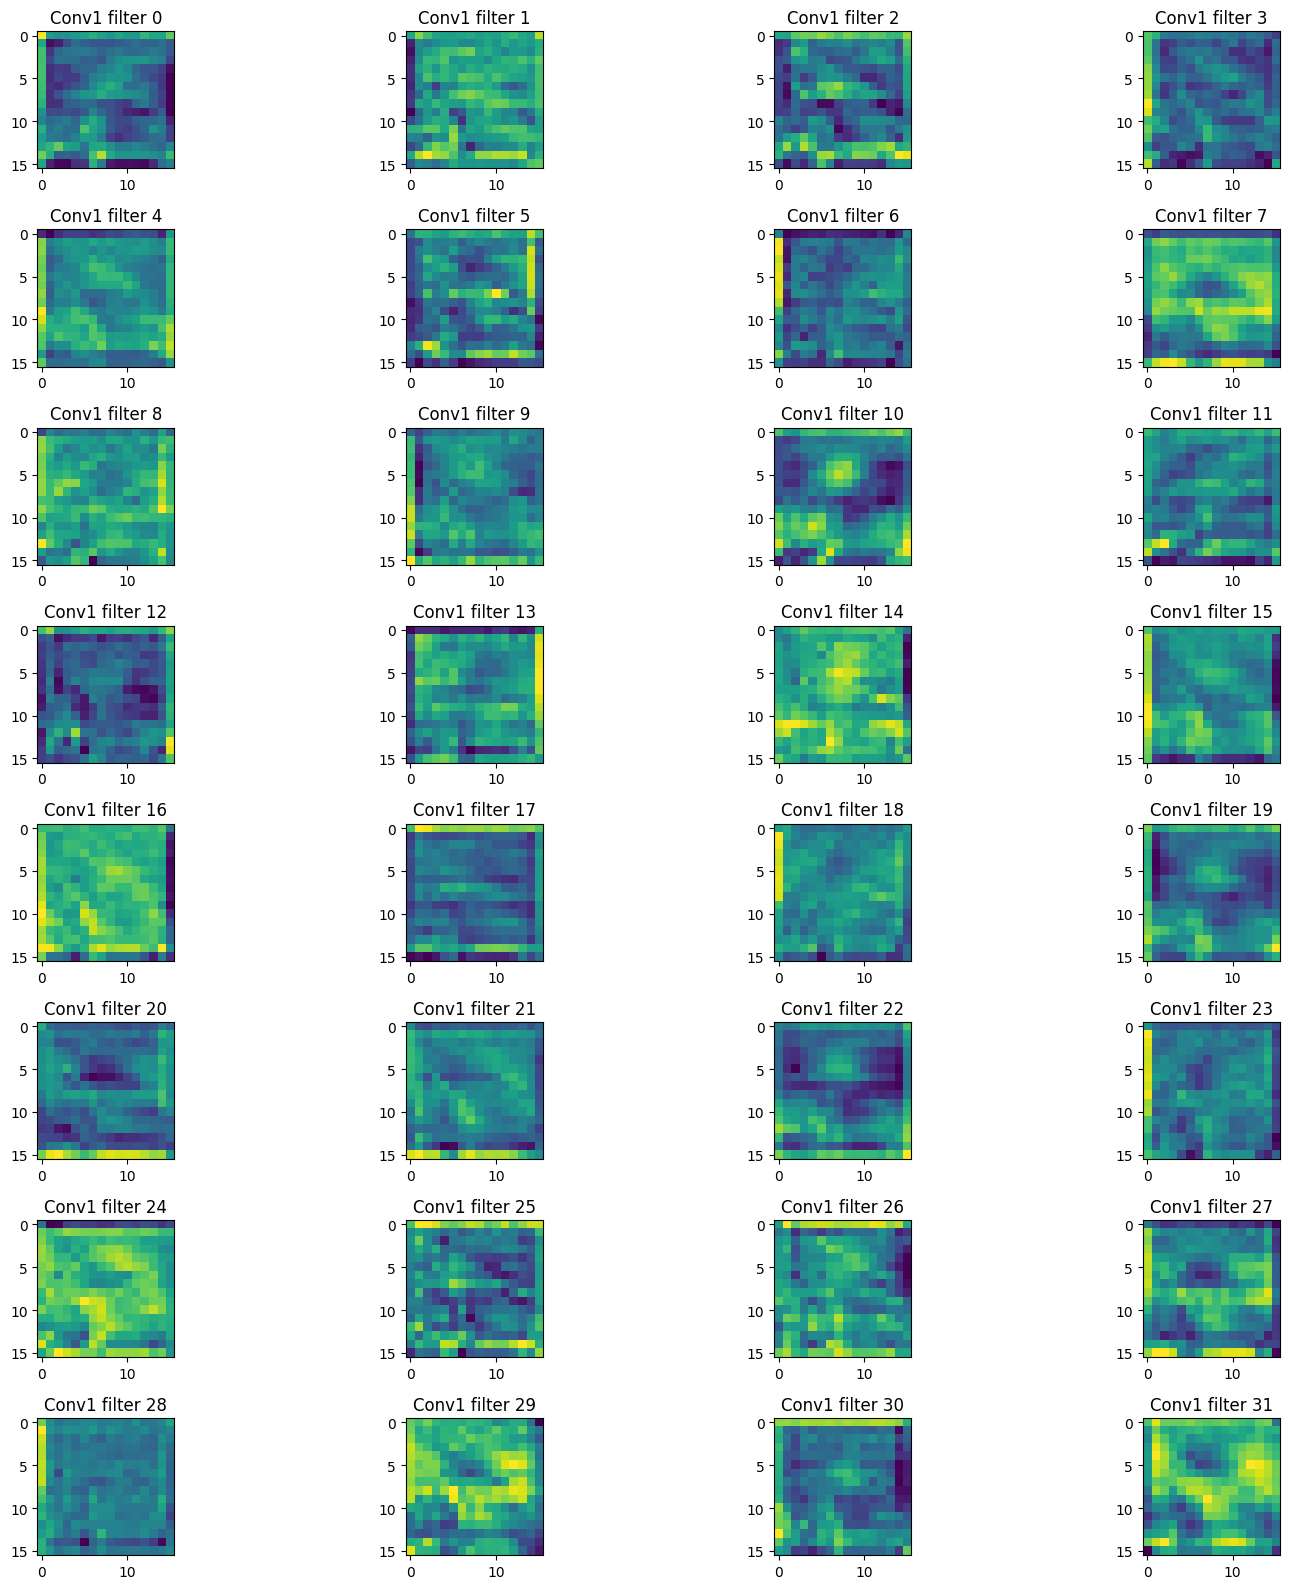

In [ ]:
plt.figure(figsize=(8, 4))

fig, axes = plt.subplots(8, 4, figsize=(16, 16))
for i in range(32):
    ax = axes[i//4, i%4]
    ax.imshow(model.activations['conv2'][0,i], cmap='viridis')
    ax.set_title(f'Conv1 filter {i}')
plt.tight_layout()
plt.show()


# et l'activation 2 detecte des formes plus abstraites et plus locales